# Deutsch’s Algorithm

Deutsch’s algorithm is the first example of a quantum algorithm that demonstrates a clear separation between quantum and classical computation. It solves the following problem:

> Given a Boolean function  
> $$ f : \{0,1\} \to \{0,1\}, $$
> determine whether $f$ is **constant** (returns the same value for both inputs) or **balanced** (returns different values for the two inputs).

Classically, this requires **two evaluations** of the function: one at $f(0)$ and one at $f(1)$. Deutsch’s algorithm can solve it with **a single query** to the quantum oracle.

---

## Algorithm Details

### Oracle Definition
The quantum oracle is defined as a unitary operation:
$$ U_f \, |x, y\rangle = |x,\, y \oplus f(x)\rangle $$
where:
- $x$ is the input qubit,
- $y$ is an ancilla qubit,
- $\oplus$ denotes XOR.

This oracle copies the function output into the second register by flipping $y$ if $f(x)=1$.

---

### Steps

1. **Initialization**  
   Start with two qubits in state:
   $$ |0\rangle \otimes |1\rangle $$

2. **Hadamard Preparation**  
   Apply a Hadamard gate to both qubits:
   $$ |0\rangle \xrightarrow{H} \tfrac{|0\rangle + |1\rangle}{\sqrt{2}}, \quad
   |1\rangle \xrightarrow{H} \tfrac{|0\rangle - |1\rangle}{\sqrt{2}} $$

   Combined state:
   $$ \tfrac{1}{2} \big( |0\rangle + |1\rangle \big) \otimes \big( |0\rangle - |1\rangle \big) $$

3. **Oracle Application**  
   Apply $U_f$.  
   Because the ancilla is in $|-\rangle$, the oracle introduces a **phase kickback**:
   $$ |x\rangle \otimes |-\rangle \;\mapsto\; (-1)^{f(x)} |x\rangle \otimes |-\rangle $$
   The ancilla remains unchanged, but the input qubit acquires a relative phase based on $f(x)$.

4. **Hadamard on Input**  
   Apply a Hadamard to the first qubit:
   - If $f$ is constant, the result is $|0\rangle$.  
   - If $f$ is balanced, the result is $|1\rangle$.  

5. **Measurement**  
   Measure the first qubit:
   - **0** → function is constant  
   - **1** → function is balanced  

---

## Key Insight

The algorithm works because the special preparation of the ancilla in $|-\rangle$ ensures that the function’s value is encoded as a **phase** on the input qubit. The final Hadamard transforms that phase into a measurable bit. Thus, quantum parallelism plus interference reduces the problem from two classical queries to **one quantum query**.


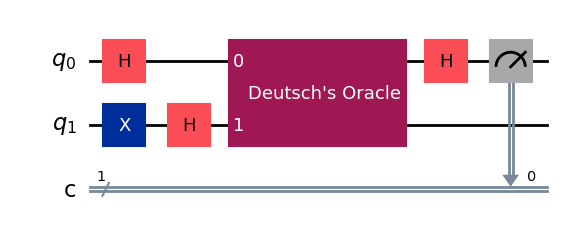

Counts: {'1': 1024}


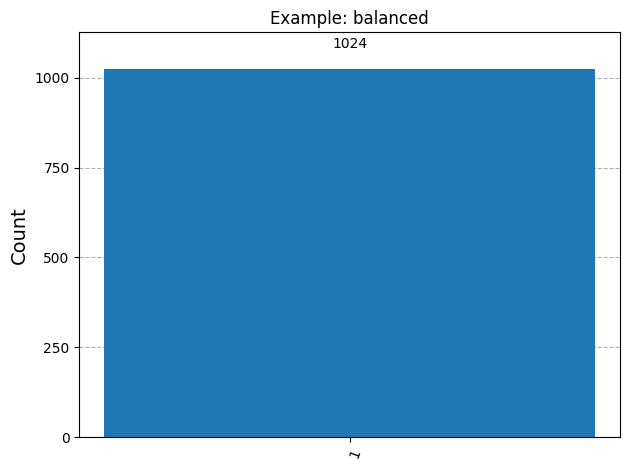

In [4]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram


# Deutsch oracle generator
def deutsch_oracle(case: str):
    qc = QuantumCircuit(2, name="Deutsch's Oracle")
    if case == "constant0":  # f(x)=0 always
        pass
    elif case == "constant1":  # f(x)=1 always
        qc.x(1)
    elif case == "balanced":  # f(x)=x
        qc.cx(0, 1)
    elif case == "balanced_not":  # f(x)=not x
        qc.cx(0, 1)
        qc.x(1)
    return qc

# Deutsch algorithm circuit
def deutsch_algorithm(oracle):
    qc = QuantumCircuit(2, 1)
    qc.x(1)        # ancilla -> |1>
    qc.h(1)        # Hadamard on ancilla -> |−>
    qc.h(0)        # Hadamard on input qubit
    qc.append(oracle, [0, 1])  # Apply oracle
    qc.h(0)              # Hadamard on first qubit
    qc.measure(0, 0)
    return qc

# Choose oracle: try "balanced"
oracle = deutsch_oracle("balanced")
qc = deutsch_algorithm(oracle)
qc.draw(output="mpl")
display(qc.draw(output="mpl"))

# Run on simulator
sim = Aer.get_backend("aer_simulator")
tqc = transpile(qc, sim)
result = sim.run(tqc, shots = 1024).result()
counts = result.get_counts()
print("Counts:", counts)
plot_histogram(counts, title="Example: balanced")

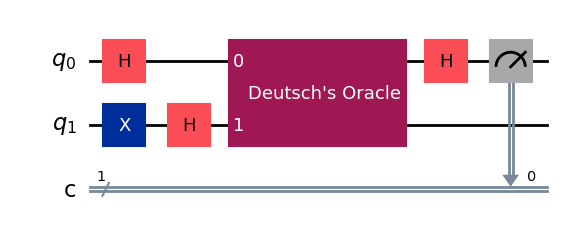

Counts: {'0': 1024}


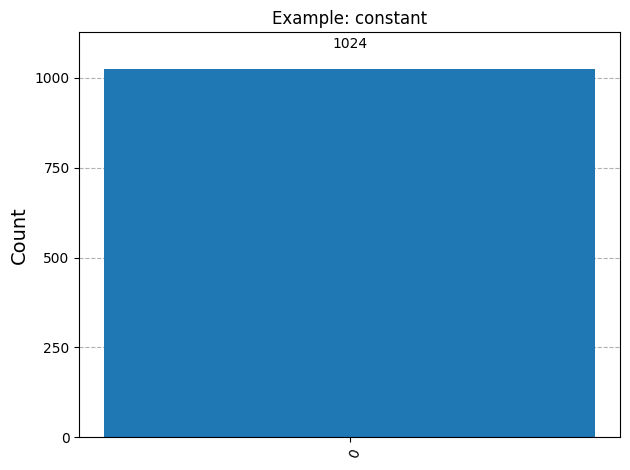

In [5]:
# Choose oracle: try "constant1"
oracle = deutsch_oracle("constant1")
qc = deutsch_algorithm(oracle)
qc.draw(output="mpl")
display(qc.draw(output="mpl"))

# Run on simulator
sim = Aer.get_backend("aer_simulator")
tqc = transpile(qc, sim)
result = sim.run(tqc, shots = 1024).result()
counts = result.get_counts()
print("Counts:", counts)
plot_histogram(counts, title="Example: constant")

As expected, using Deutsch's algorithm we get all 1 if the function is balanced and all 0 if the function is constant.